<a href="https://colab.research.google.com/github/Firdazspace/datasupport/blob/main/UAS_Data_Science_Fundamental_Data_Pelanggan_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Laporan Tugas Akhir</h1>
<h2> Sistem Analisis untuk Memahami Pelanggan Toko Ideal dalam Sebuah Bisnis </h2>

<h2>1. latar Belakang</h2>

<h3>1.1 Definisi Permasalahan </h3>


Permasalahan ini mencakup pentingnya mengumpulkan, menganalisis, dan memahami data pelanggan secara mendalam untuk mengidentifikasi profil pelanggan ideal yang dapat meningkatkan kinerja dan kesuksesan toko secara keseluruhan. Data pelanggan ideal mencakup informasi tentang preferensi, perilaku belanja, kebiasaan, dan karakteristik lainnya yang relevan untuk menciptakan pengalaman belanja yang lebih personal, serta untuk mengambil keputusan strategis yang tepat dalam rangka meningkatkan loyalitas pelanggan dan memaksimalkan keuntungan toko.








<h3> 1.2	Identifikasi Permasalahan Bisnis </h3>

Dengan memahami data pelanggan ideal, toko dapat meningkatkan kepuasan pelanggan, mengoptimalkan operasi, mengurangi biaya, dan mencapai pertumbuhan bisnis yang berkelanjutan. Hal ini menjadi kunci dalam persaingan pasar yang semakin ketat dan dinamis, serta membantu toko untuk tetap relevan dan sukses dalam jangka panjang. Oleh karena itu pertanyaan – pertanyaan berikut perlu dijawab, yaitu:

1.	Faktor apa yang mempengaruhi banyaknya penjualan
2.	Apa langkah-langkah konkret yang telah diambil oleh toko berdasarkan analisis data pelanggan untuk meningkatkan pengalaman pelanggan dan strategi pemasaran?

<h3> 1.3	Asumsi, Kebutuhan, dan Limitasi </h3>

Dengan memahami data pelanggan ideal, toko dapat meningkatkan kepuasan pelanggan, mengoptimalkan operasi, mengurangi biaya, dan mencapai pertumbuhan bisnis yang berkelanjutan. Hal ini menjadi kunci dalam persaingan pasar yang semakin ketat dan dinamis, serta membantu toko untuk tetap relevan dan sukses dalam jangka panjang.

<h2> 2.	Tujuan Proyek </h2>

<h3> 2.1	Tujuan Bisnis </h3>

Membuat sistem yang dapat memahami pelanggan ideal dalam sebuah bisnis penjualan

<h3> 2.2	Measureable Outcomes / Business Criteria </h3>


Jumlah presentase pengeluaran pelanggan tertinggi berdasrkan beberapa data preferensi yang didapat serta pengelompokan berdasarkan umur

<h2> 3. Solusi dari Perspektif Bisnis </h2>

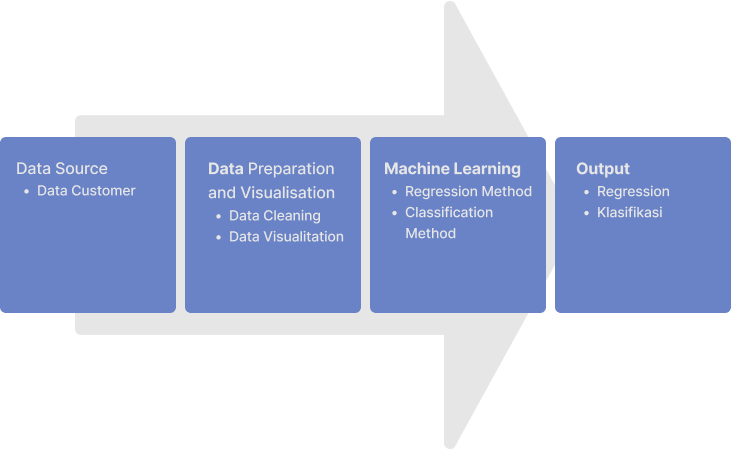

**Gambar 1 System Flow dari Analisis Pelanggan Toko Ideal dalam Sebuah Bisnis**

Kami mengumpulkan seluruh data-data  seperti data pelanggan Toko Kemudian data dibersihkan seperti dilakukan imputation data yang hilang, scaling jika datanya tidak pada scale yang sama. Lalu data yang bersih tersebut dilakukan analisis statistic dan visualisasi. Baru kemudian setelah mendapatkan pemahaman lebih dalam maka data dapat ditambahkan atau dikurangi tergantung dengan temuan saat di visualisasi data. Setelah data siap maka data dapat dimasukan ke system klasifikasi

<h2> 4	Instrumen Pengukuran Keberhasilan </h2>

Sistem dikatakan berhasil jika MAE dan MSE rendah serta akurasinya lebih dari

<h2> 5	Dataset </h2>

<h3> 5.1	Pengumpulan Data </h3>

Berdasarkan masalah yang dihadapi maka kami mengumpulkan data – data dengan mengakses website berikut: www.kaggle.com. Bentuk tampilan dari website diatas ditunjukan pada Gambar dibawah. Kami dapat melihat berbagai informasi terkait Data Pelanggan toko seperti Pendapatan Tahunan, skor pembelanjaan, dll.

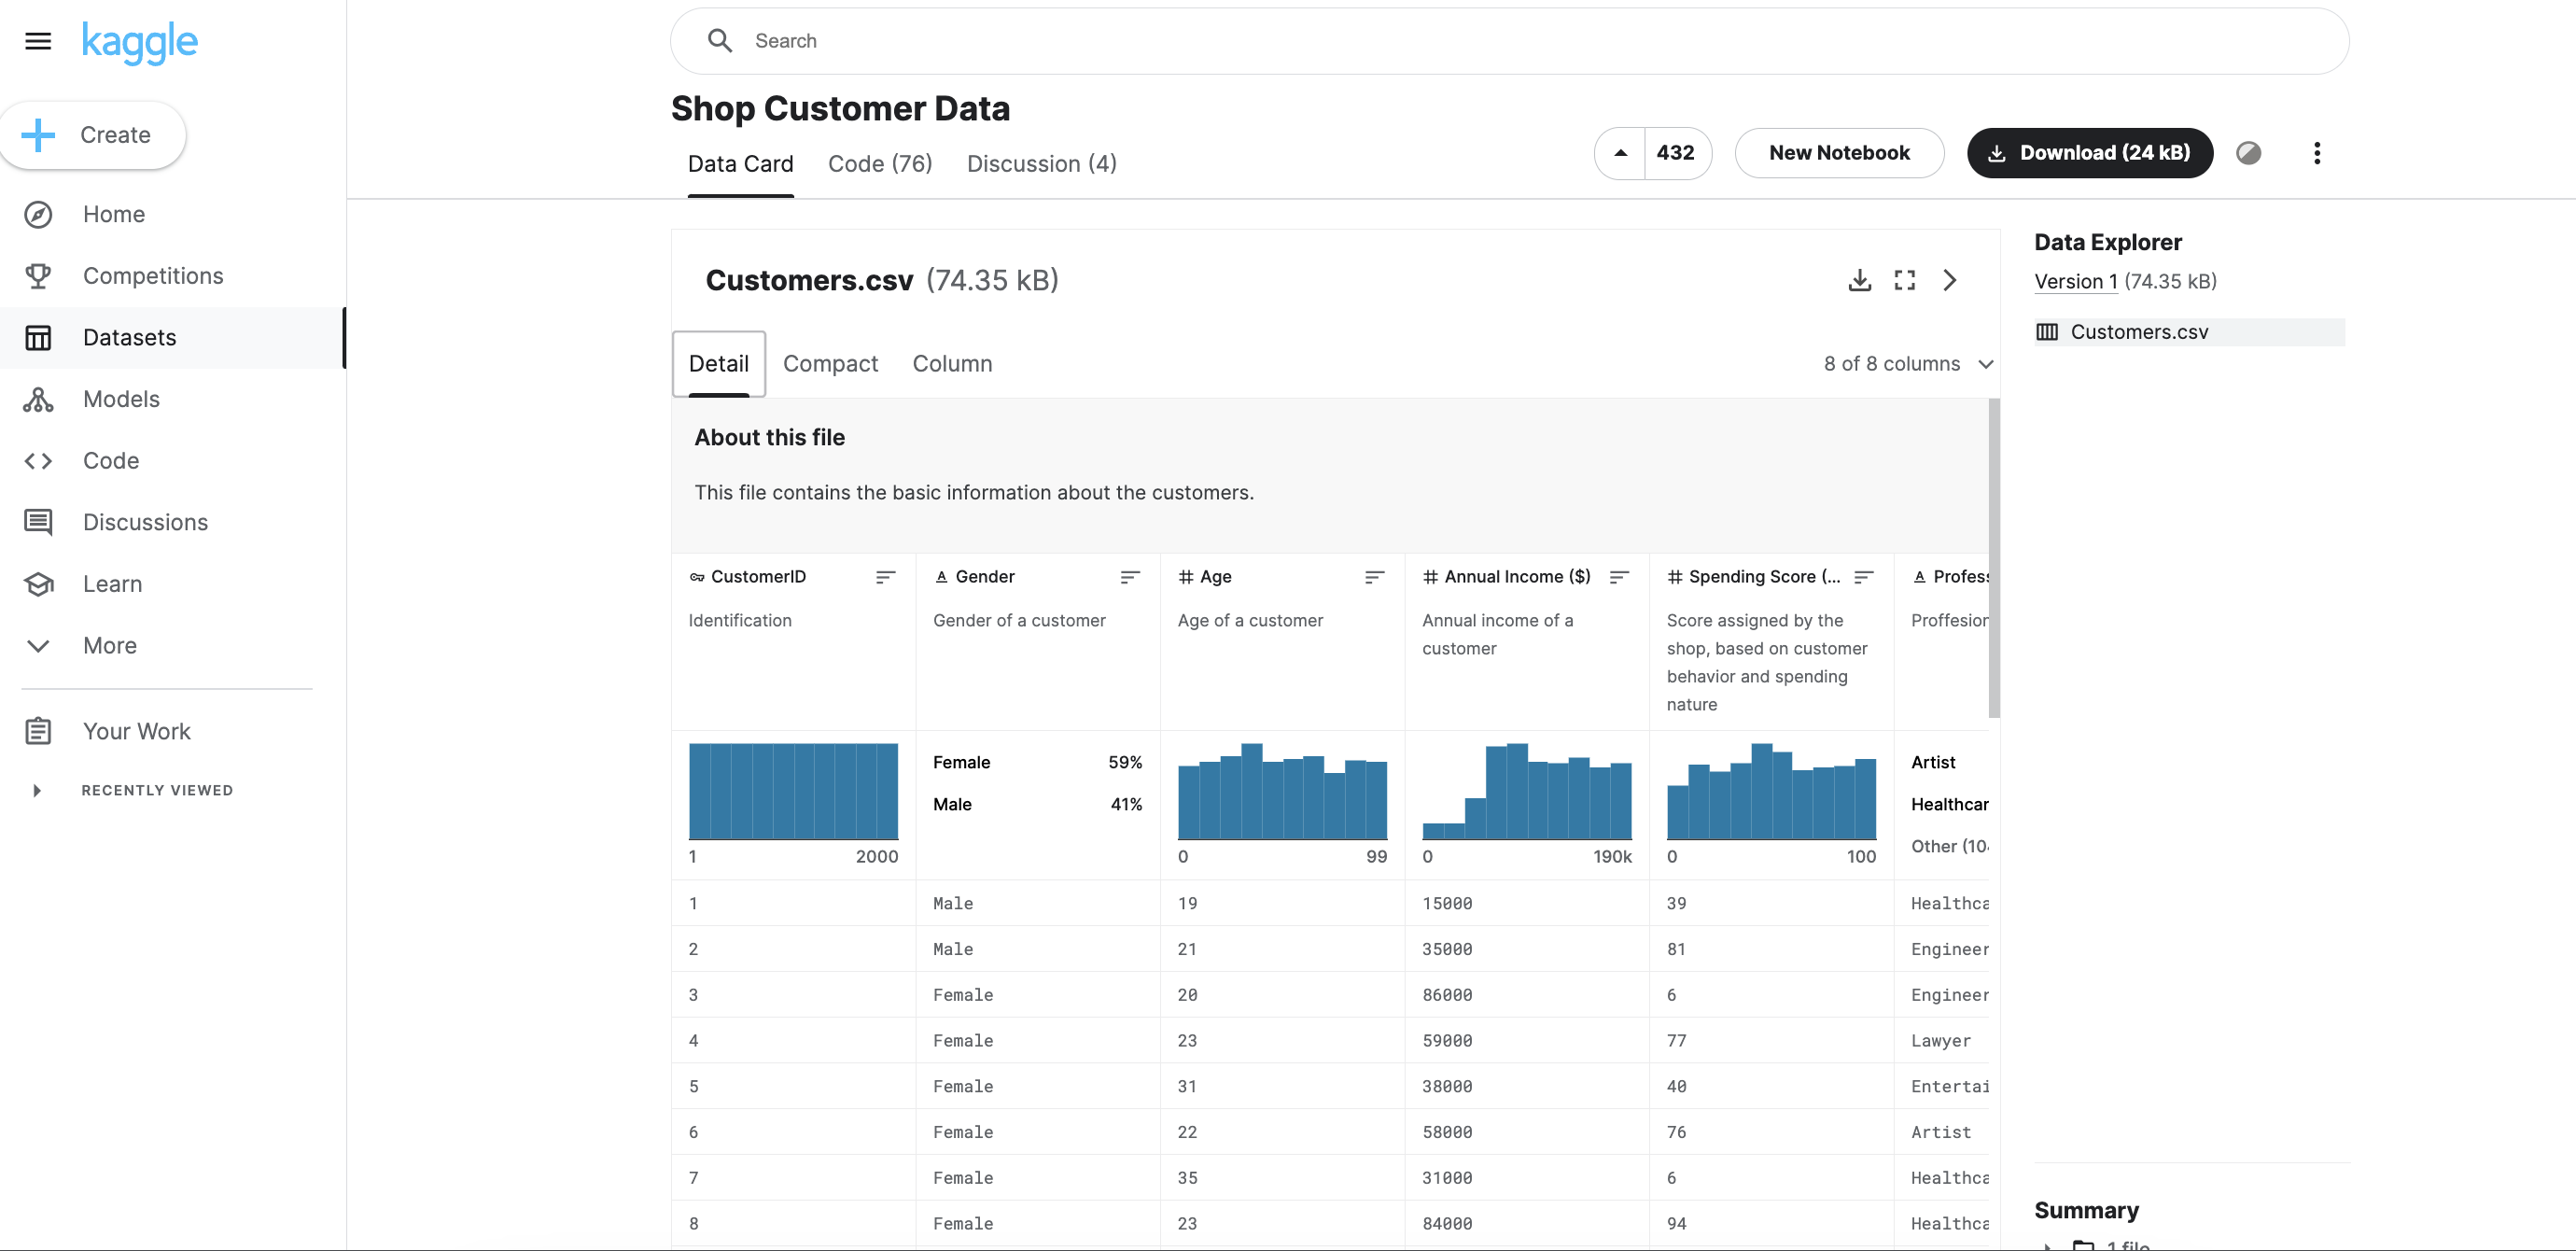

**Gambar 2 Tampilan www.kaggle.com**

<h3> 5.2	Menelaah data dan mengorganisir data </h3>

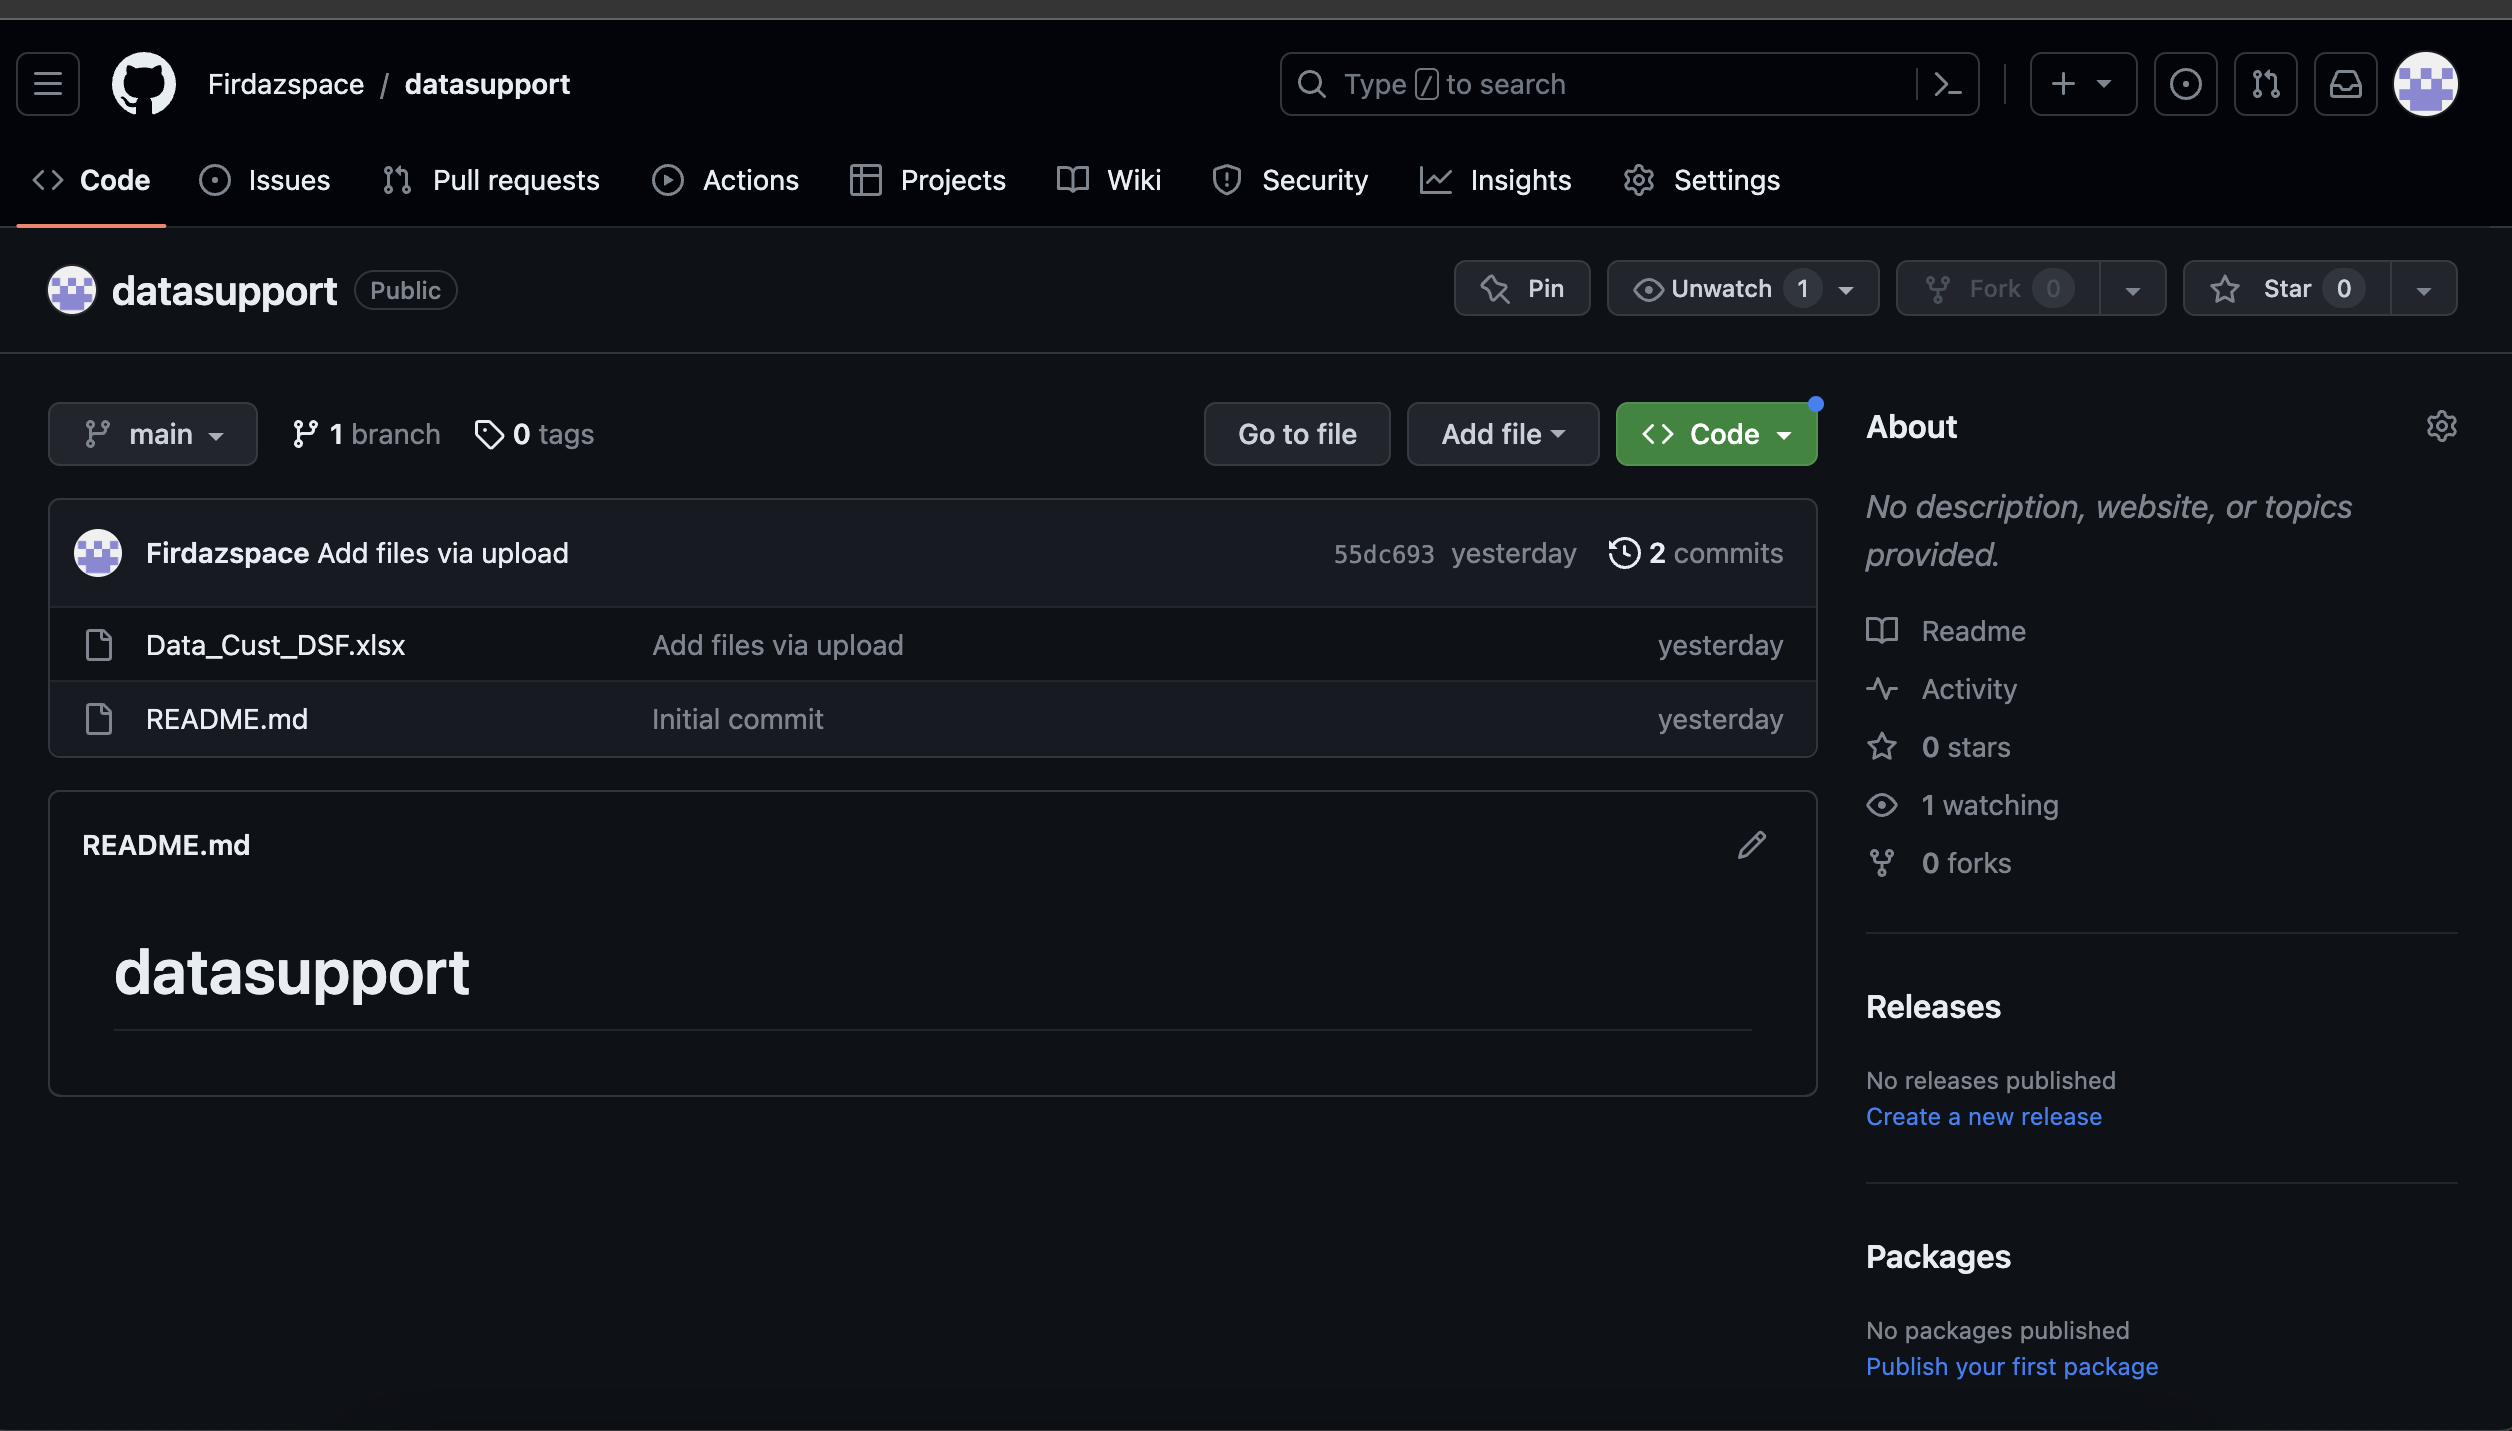

Setelah kami mendapatkan semua data yang diperlukan kami melihat data tersebut. Kriteria pertama yang digunakan adalah ketersedian data. Untuk menelaah dan mengorganisir data pelanggan toko ideal dalam bisnis, Anda harus mengidentifikasi data yang relevan, kumpulkan data pelanggan dari berbagai sumber, bersihkan data dari informasi tidak relevan, Setelah kami mendapatkan semua data yang diperlukan kami melihat data tersebut. Karena kami sudah menemukan data yang sudah siap pakai dari kaggle. Data tersebut sudah kami download yang sudah berbentuk excel

File csv tersebut sudah kami upload di github dan di share dengan kondisi semua orang bisa mengakses jika memiliki link. Link yang sudah dibuat adalah sebagai berikut: https://github.com/Firdazspace/datasupport/raw/main/Data_Cust_DSF.xlsx

<h3> 5.3	Menentukan objek data dan rincian data </h3>

Objek data pada proyek ini adalah  permasalahan regresi dan korelasi Sistem Analisis untuk Memahami Pelanggan Toko Ideal dalam Sebuah Bisnis. Kita diharapakan dapat mengidentifikasi profil pelanggan ideal yang dapat meningkatkan kinerja dan kesuksesan toko secara keseluruhan

In [ ]:


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import warnings

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#data modeling
from sklearn.linear_model import LogisticRegression

#data evaluation
from sklearn.metrics import accuracy_score, classification_report, silhouette_score


Tabel 1 Cuplikan isi dari dataset

In [ ]:
df = pd.read_excel(r'https://github.com/Firdazspace/datasupport/raw/main/Data_Cust_DSF.xlsx')
df.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

Keterangan:

<table class=MsoTableGrid border=0 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none'>
 <tr>
  <td width=387 style='width:290.35pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>CustomerID
  = ID Pelanggan</span></p>
  </td>
  <td width=491 style='width:13.0cm;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>Gender
  = Jenis Kelamin/span></p>
  </td>
 </tr>
 <tr>
  <td width=387 style='width:290.35pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>Age
  = Usia</span></p>
  </td>
  <td width=491 style='width:13.0cm;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>Anual Income
  = Pendapatan Tahunan</span></p>
  </td>
 </tr>
 <tr>
  <td width=387 style='width:290.35pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>Spending Score
  = Skor Pembelanjaan</span></p>
  </td>
  <td width=491 style='width:13.0cm;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>Profession
  = Profesi</span></p>
  </td>
 </tr>
 <tr>
  <td width=387 style='width:290.35pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>Work Experience
  = Pengalaman Kerja</span></p>
  </td>
  <td width=491 style='width:13.0cm;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin:0cm;line-height:150%'><span lang=EN-US
  style='font-size:10.0pt;line-height:150%;font-family:"Times New Roman",serif'>Family Size
  = Jumlah Keluarga</span></p>
  </td>
 </tr>
 <tr>
  </table>

<h3> 5.4	Validasi data dengan statistik </h3>


Untuk analis deskriptif statistik dapat dilihat pada tabel 2 dibawah ini. Dari tabel 2, kami dapat mengetahui rata – rata, nilai maksimal, dan nilai minimal dari tiap atribut atau fitur. Dari Tabel 2 tidak ada yang aneh dari nilai – nilai statistik tersebut sehingga dapat kami katakan bahwa data gabungan sudah valid.

**Tabel 2 Tampilan statistic deskriptif dari dataset**

In [ ]:
df.describe()

CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     9.000000

<h2> 6 Data Cleaning </h2>

<h3> 6.1	Cek kesesuaian jenis data. <h3>

Berdasarkan gambar 3 dibawah ini semua atribut sudah sesuai dengan tipe datanya.

In [ ]:
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object


**Gambar 3 Tipe data dari setiap atribut**

<h3> 6.2	Cek adanya missing value </h3>

In [ ]:
# the code below is adopted from this https://github.com/ashishpatel26/Amazing-Feature-Engineering/blob/master/feature_cleaning/missing_data.py

def check_missing(data,output_path=None):
    """
    check the total number & percentage of missing values
    per variable of a pandas Dataframe
    """

    result = pd.concat([data.isnull().sum(),data.isnull().mean()],axis=1)
    result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
    if output_path is not None:
        result.to_csv(output_path+'missing.csv')
        print('result saved at', output_path, 'missing.csv')
    return result

Berdasarkan gambar 4 terdapat satu atribut yang memiliki missing value yaitu: profession berjumlah 35.

In [ ]:
check_missing(df)

total missing  proportion
CustomerID                          0      0.0000
Gender                              0      0.0000
Age                                 0      0.0000
Annual Income ($)                   0      0.0000
Spending Score (1-100)              0      0.0000
Profession                         35      0.0175
Work Experience                     0      0.0000
Family Size                         0      0.0000

**Gambar 4 Tampilan jumlah data yang hilang pada dataset**

<h3> 6.3	Inputasi data yang hilang dengan nilai mean atau rata-rata </h3>

In [ ]:
df = df.fillna(df.mean(numeric_only=True))

Berdasarkan gambar, semua atribut sudah tidak memiliki data yang hilang.

In [ ]:
check_missing(df)

total missing  proportion
CustomerID                          0      0.0000
Gender                              0      0.0000
Age                                 0      0.0000
Annual Income ($)                   0      0.0000
Spending Score (1-100)              0      0.0000
Profession                         35      0.0175
Work Experience                     0      0.0000
Family Size                         0      0.0000

**Gambar 5 Tampilan data setelah di inputasi**

<h2> 7	Data Visualization </h2>

<h3> 7.1 Analisis data profesi dengan penghasilan tahunan</h3>

In [ ]:
df.head(2)

CustomerID Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1   Male   19              15000                      39   
1           2   Male   21              35000                      81   

   Profession  Work Experience  Family Size  
0  Healthcare                1            4  
1    Engineer                3            3

In [ ]:
df_profession=df.groupby(["Profession", "Gender"])["Annual Income ($)"].sum().sort_values(ascending=False ).reset_index()
df_profession.head(2)

Profession  Gender  Annual Income ($)
0     Artist  Female           41078884
1     Artist    Male           25492383

Text(0.5, 1.0, ' profession && annual income')

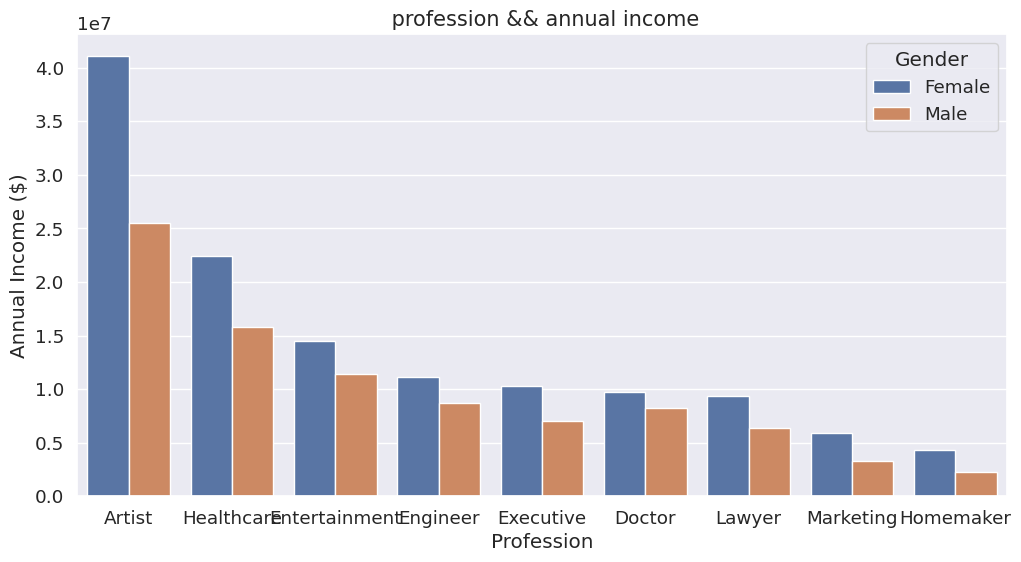

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_profession, x= "Profession", y= "Annual Income ($)", hue="Gender")
plt.title(" profession && annual income", fontsize= 15)

**Gambar 6** Analisis data profesi dengan penghasilan tahunan (Wanita memiliki penghasilan lebih tinggi daripada pria, dan profesi artis memiliki pengfhasilan tertinggi

In [ ]:
df1=df.drop(["Gender","Profession"], axis=1)
df1.head(2)

CustomerID  Age  Annual Income ($)  Spending Score (1-100)  \
0           1   19              15000                      39   
1           2   21              35000                      81   

   Work Experience  Family Size  
0                1            4  
1                3            3

Text(0.5, 1.0, 'correlation')

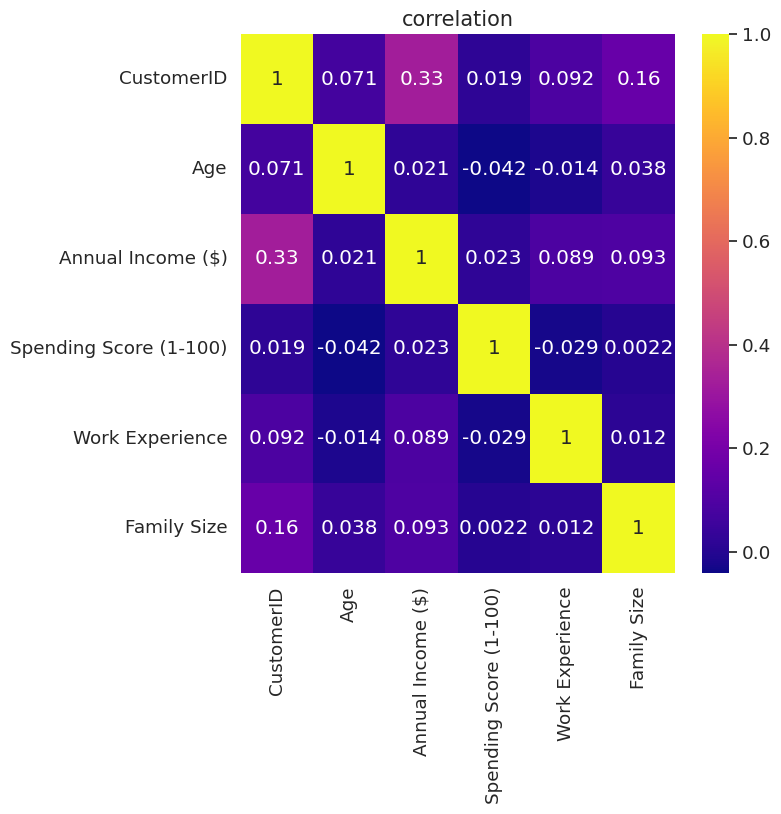

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df1.corr(),cmap="plasma", annot=True)
plt.title("correlation", fontsize= 15)

**Gambar 7 tabel korelasi semua atribut dengan spending score** (spending score tidak ada hubungannya dengan (age, annual income, nwork experience, family size)

<h3> 7.3	Plot regresi negatif antara umur dengan pengeluaran </h3>
Berdasarkan gambar sebarannya menunjukan korelasi negatif antara jumlah test umur dengan pengeluaran


Text(0.5, 1.0, 'Korelasi umur dengan pengeluaran')

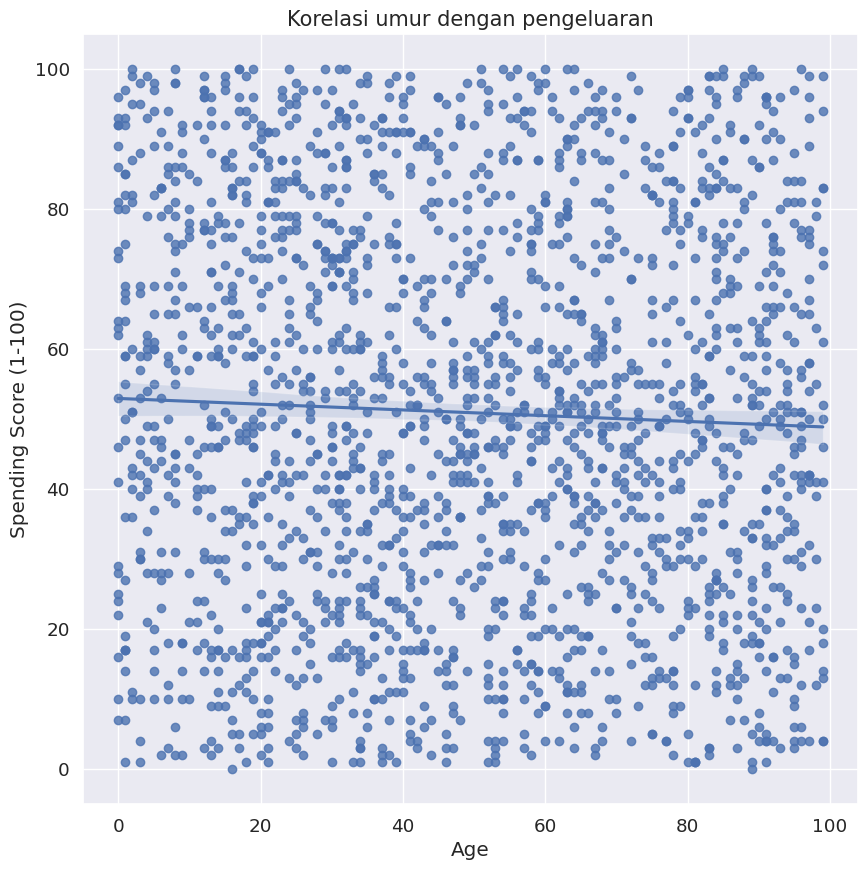

In [ ]:
sns.regplot(x="Age", y="Spending Score (1-100)", data=df)
plt.title("Korelasi umur dengan pengeluaran", fontsize= 15)

**Gambar 8 Korelasi Umur dengan Pengeluaran**

In [ ]:
df[['Age', 'Spending Score (1-100)']].corr()

Age  Spending Score (1-100)
Age                     1.000000               -0.041798
Spending Score (1-100) -0.041798                1.000000

<h3> 7.4	Plot regresi dari Korelasi Pendapatan tahunan dengan pengalaman kerja </h3>
terdapat korelasi positif yang lemah antara pendapatan tahunan dengan pengalaman kerja


Text(0.5, 1.0, 'Korelasi Pendapatan tahunan dengan pengalaman kerja')

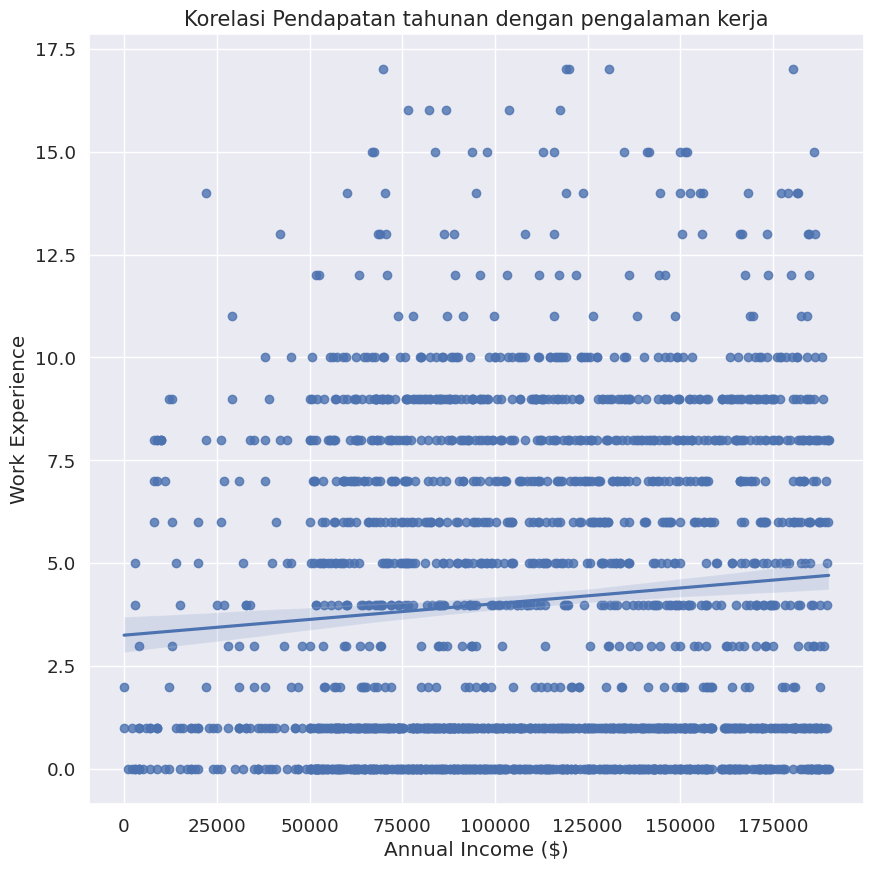

In [ ]:
sns.regplot(x="Annual Income ($)", y="Work Experience", data=df)
plt.title("Korelasi Pendapatan tahunan dengan pengalaman kerja", fontsize= 15)

**Gambar 9 Korelasi Pendapatan Tahunan dengan Pengalaman Kerja**

In [ ]:
df[['Annual Income ($)', 'Work Experience']].corr()

Annual Income ($)  Work Experience
Annual Income ($)           1.000000         0.089136
Work Experience             0.089136         1.000000

<h3>7.5	Plot Korelasi pendapatan tahunan dengan pengeluaran </h3>
Terdapat korelasi positif yang lemah antara pendapatan tahunan dengan pengeluaran


Text(0.5, 1.0, 'Korelasi pendapatan tahunan dengan pengeluaran')

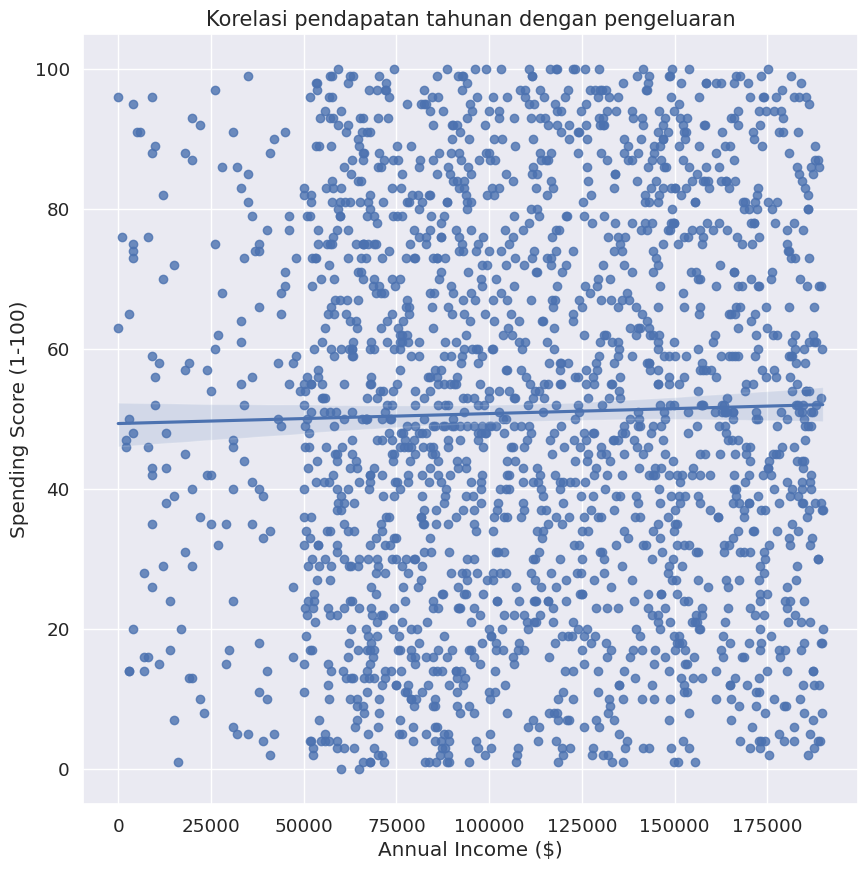

In [ ]:
sns.regplot(x="Annual Income ($)", y="Spending Score (1-100)", data=df)
plt.title("Korelasi pendapatan tahunan dengan pengeluaran", fontsize= 15)

**Gambar 10 Korelasi pendapatan tahunan dengan pengeluaran**

In [ ]:
df[['Annual Income ($)', 'Spending Score (1-100)']].corr()

Annual Income ($)  Spending Score (1-100)
Annual Income ($)                1.000000                0.023299
Spending Score (1-100)           0.023299                1.000000

**<h3>7.6	Plot Korelasi pengeluaran dengan jumlah keluarga </h3>**
Terdapat korelasi positif yang lemah antara pengeluaran dengan jumlah keluarga


Text(0.5, 1.0, 'Korelasi pengeluaran dengan jumlah keluarga')

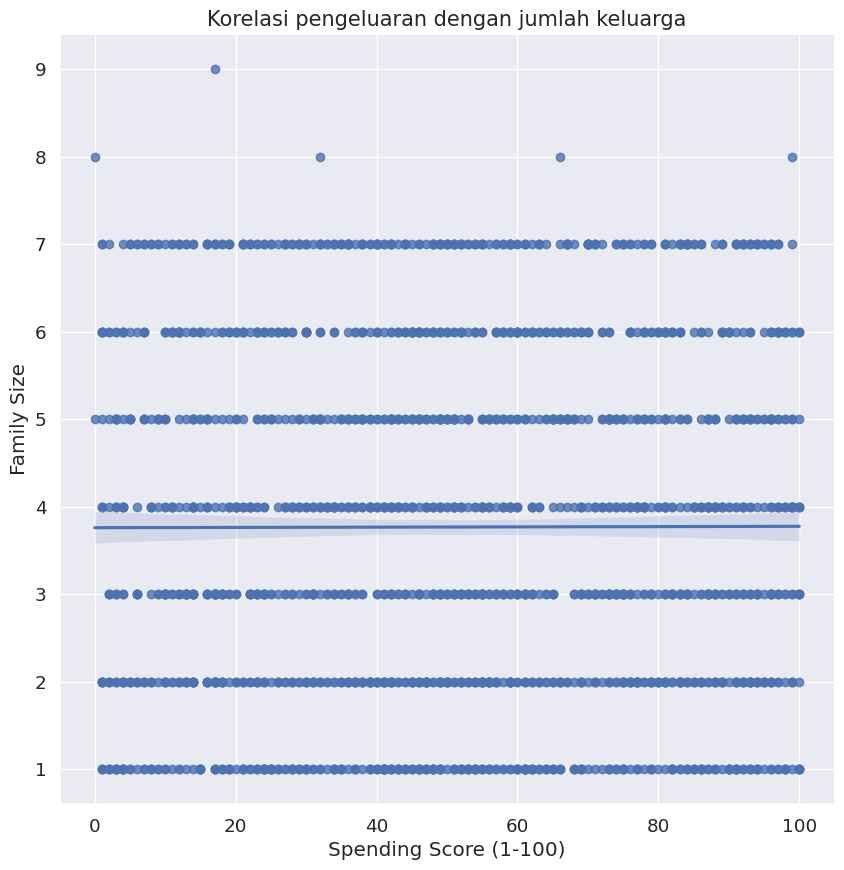

In [ ]:
sns.regplot(x="Spending Score (1-100)", y="Family Size", data=df)
plt.title("Korelasi pengeluaran dengan jumlah keluarga", fontsize= 15)

In [ ]:
df[['Spending Score (1-100)', 'Family Size']].corr()

Spending Score (1-100)  Family Size
Spending Score (1-100)                1.000000     0.002232
Family Size                           0.002232     1.000000

**<h3>7.7	Menampilkan box plot antara spending score dengan profesi </h3>**
terdapat perbedaan nilai median antara spending dengan profesi. Namun tidak ada perbedaan yang signifikan antara kesembilan profesi terhadap pengeluaran


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Artist'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Homemaker'),
  Text(8, 0, 'Marketing')])

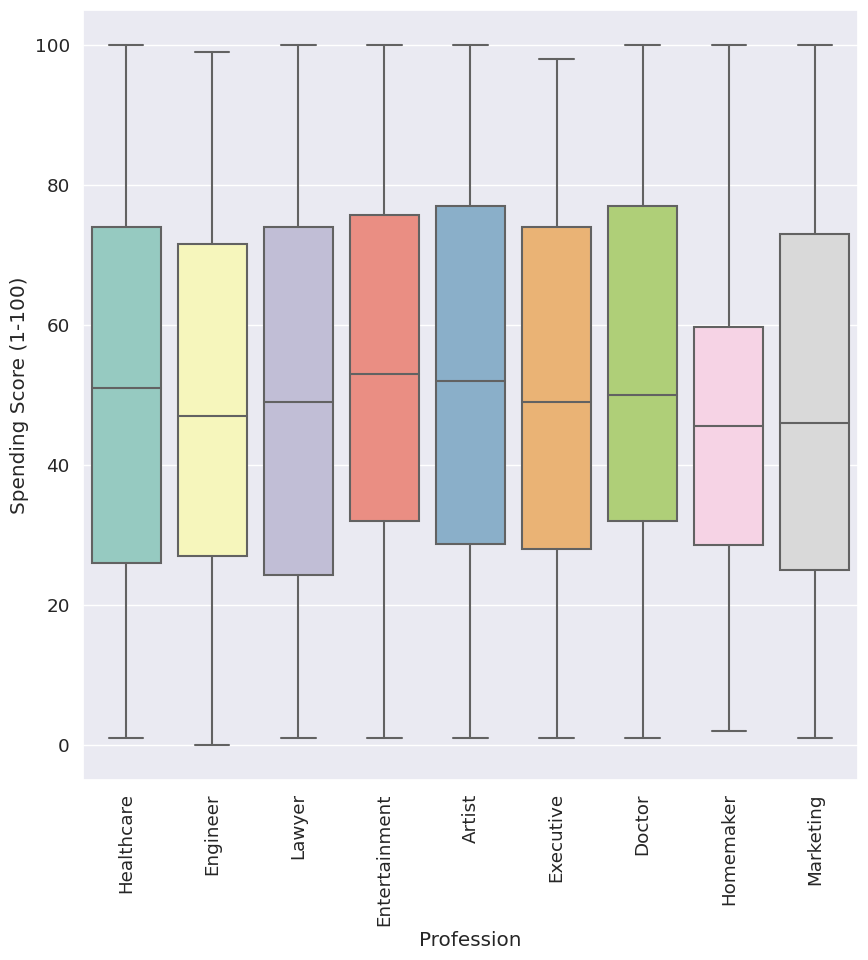

In [ ]:
sns.boxplot(data=df,x='Profession',y='Spending Score (1-100)',palette='Set3')
plt.xticks(rotation=90)

**<h3>7.8 Menampilkan plot jumlah data pengalaman kerja </h3>**


Text(0, 0.5, 'Count')

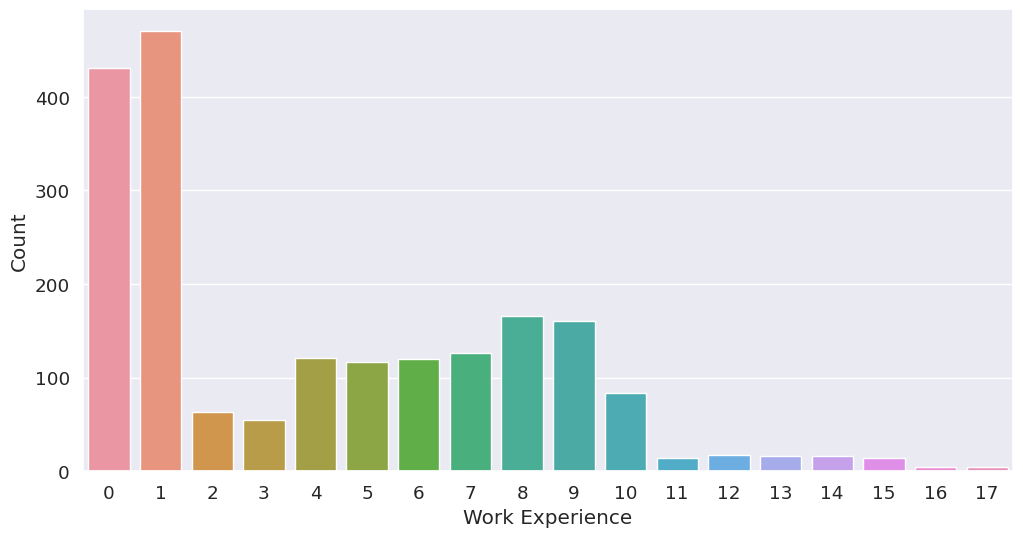

In [ ]:
plt.figure(figsize = (12, 6))
g = sns.countplot(x = 'Work Experience', data = df, orient = 'h')
g.set_ylabel('Count')

**<h3>7.9	Menampilkan plot jumlah data profesi </h3>**


Text(0, 0.5, 'Count')

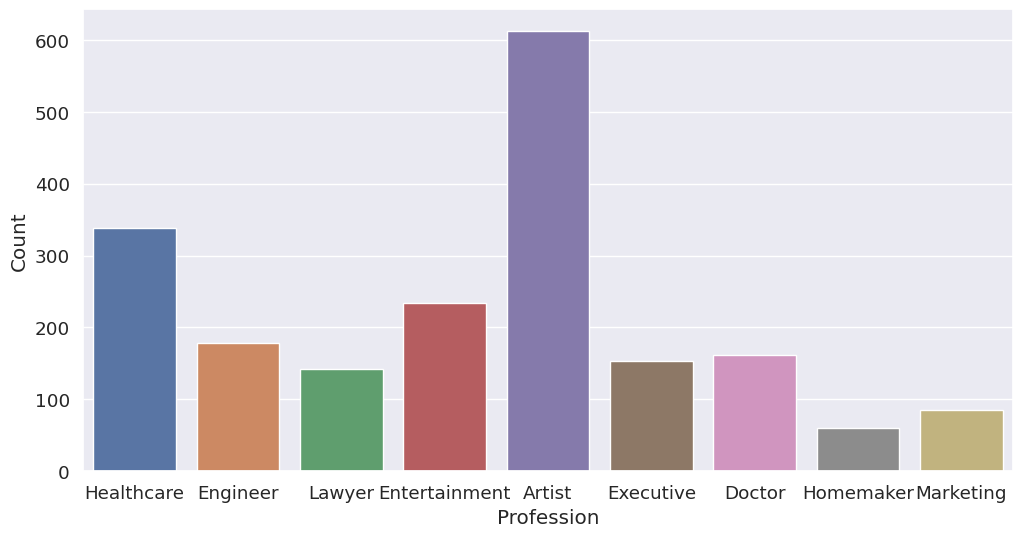

In [ ]:
plt.figure(figsize = (12, 6))
g = sns.countplot(x = 'Profession', data = df, orient = 'h')
g.set_ylabel('Count')

**<h2> 8 Transformasi Data </h2>**

**<h2> 8.1 mengubah nama variabel </h2>**

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [ ]:
df.rename(columns={"Gender":"Jenis_Kelamin","Age": "Umur","Annual Income ($)":"Pendapatan_Tahunan","Spending Score (1-100)":"Skor_Pengeluaran","Profession":"Profesi","Work Experience":"Pengalaman_Kerja","Family Size":"Jumlah_Keluarga"},inplace=True)

In [ ]:
df

CustomerID Jenis_Kelamin  Umur  Pendapatan_Tahunan  Skor_Pengeluaran  \
0              1          Male    19               15000                39   
1              2          Male    21               35000                81   
2              3        Female    20               86000                 6   
3              4        Female    23               59000                77   
4              5        Female    31               38000                40   
...          ...           ...   ...                 ...               ...   
1995        1996        Female    71              184387                40   
1996        1997        Female    91               73158                32   
1997        1998          Male    87               90961                14   
1998        1999          Male    77              182109                 4   
1999        2000          Male    90              110610                52   

            Profesi  Pengalaman_Kerja  Jumlah_Keluarga  
0        Healthcare                 1                4  
1          Engineer                 3                3  
2          Engineer                 1                1  
3            Lawyer                 0                2  
4     Entertainment                 2                6  
...             ...               ...              ...  
1995         Artist                 8                7  
1996         Doctor                 7                7  
1997     Healthcare                 9                2  
1998      Executive                 7                2  
1999  Entertainment                 5                2  

[2000 rows x 8 columns]

**<h2> 8.2 Melihat Unique Value </h2>**

In [ ]:
df.CustomerID.unique()

array([   1,    2,    3, ..., 1998, 1999, 2000])

In [ ]:
df.Jenis_Kelamin.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.Umur.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41,
       16, 76, 62, 80,  1,  0, 86, 79, 83, 95, 93, 78, 15,  6, 84,  4, 91,
       14, 92, 77, 89, 12,  7, 94, 96, 74, 85, 73,  9, 10, 11, 17, 90, 61,
       13, 72,  5, 75, 99, 88, 82,  8, 87,  3, 97, 81, 98,  2, 71])

In [ ]:
df.Pendapatan_Tahunan.unique()

array([ 15000,  35000,  86000, ...,  90961, 182109, 110610])

In [ ]:
df.Skor_Pengeluaran.unique()

array([ 39,  81,   6,  77,  40,  76,  94,   3,  72,  14,  99,  15,  13,
        79,  35,  66,  29,  98,  73,   5,  82,  32,  61,  31,  87,   4,
        92,  17,  26,  75,  36,  28,  65,  55,  47,  42,  52,  60,  54,
        45,  41,  50,  46,  51,  56,  59,  48,  49,  53,  44,  57,  58,
        43,  91,  95,  11,   9,  34,  71,  88,   7,  10,  93,  12,  97,
        74,  22,  90,  20,  16,  89,   1,  78,  83,  27,  63,  86,  69,
        24,  68,  85,  23,   8,  18,   0,  33,  70,  37,  64,  30,  96,
         2,  38,  21,  84,  62,  80, 100,  67,  19,  25])

In [ ]:
df.Profesi.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [ ]:
df.Pengalaman_Kerja.unique()

array([ 1,  3,  0,  2,  4,  9, 12, 13,  5,  8, 14,  7,  6, 10, 11, 15, 16,
       17])

In [ ]:
df.Jumlah_Keluarga.unique()

array([4, 3, 1, 2, 6, 5, 8, 7, 9])

**<h2> 8.3 Menambahkan data kedalam variabel </h2>**

In [ ]:
df['Profesi']=df['Profesi'].fillna("DOSEN")

In [ ]:
df['Profesi'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'DOSEN'],
      dtype=object)

**<h2> 8.4 Mengganti Tipe Data </h2>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          2000 non-null   int64 
 1   Jenis_Kelamin       2000 non-null   object
 2   Umur                2000 non-null   int64 
 3   Pendapatan_Tahunan  2000 non-null   int64 
 4   Skor_Pengeluaran    2000 non-null   int64 
 5   Profesi             2000 non-null   object
 6   Pengalaman_Kerja    2000 non-null   int64 
 7   Jumlah_Keluarga     2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df["Jenis_Kelamin"]=df["Jenis_Kelamin"].astype("string")
df["Profesi"]=df["Profesi"].astype("string")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          2000 non-null   int64 
 1   Jenis_Kelamin       2000 non-null   string
 2   Umur                2000 non-null   int64 
 3   Pendapatan_Tahunan  2000 non-null   int64 
 4   Skor_Pengeluaran    2000 non-null   int64 
 5   Profesi             2000 non-null   string
 6   Pengalaman_Kerja    2000 non-null   int64 
 7   Jumlah_Keluarga     2000 non-null   int64 
dtypes: int64(6), string(2)
memory usage: 125.1 KB


**<h2> 8.5 Mengecek Duplication Value </h2>**

In [ ]:
df.duplicated().sum()

0

**<h3> 8.6	Transformasi Pendapatan Tahunan dengan One Hot Encoding </h3>**
Untuk dapat melihat korelasi antara Pendapatan Tahunan dengan atribut lain maka perlu dilakukan transformasi data dari Pendapatan Tahunan dengan one hot encoding. Kemudian dengan menggunakan metode korelasi pearson maka diperoleh tabel korelasi seperti pada Gambar dibawah



In [ ]:
df

CustomerID Jenis_Kelamin  Umur  Pendapatan_Tahunan  Skor_Pengeluaran  \
0              1          Male    19               15000                39   
1              2          Male    21               35000                81   
2              3        Female    20               86000                 6   
3              4        Female    23               59000                77   
4              5        Female    31               38000                40   
...          ...           ...   ...                 ...               ...   
1995        1996        Female    71              184387                40   
1996        1997        Female    91               73158                32   
1997        1998          Male    87               90961                14   
1998        1999          Male    77              182109                 4   
1999        2000          Male    90              110610                52   

            Profesi  Pengalaman_Kerja  Jumlah_Keluarga  
0        Healthcare                 1                4  
1          Engineer                 3                3  
2          Engineer                 1                1  
3            Lawyer                 0                2  
4     Entertainment                 2                6  
...             ...               ...              ...  
1995         Artist                 8                7  
1996         Doctor                 7                7  
1997     Healthcare                 9                2  
1998      Executive                 7                2  
1999  Entertainment                 5                2  

[2000 rows x 8 columns]

In [ ]:
## membuat kategori variable dan numerical variable

C = (df.dtypes == 'string')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64')
NumericVariables = list(Integer[Integer].index)

In [ ]:
CategoricalVariables

['Jenis_Kelamin', 'Profesi']

In [ ]:
NumericVariables

['CustomerID',
 'Umur',
 'Pendapatan_Tahunan',
 'Skor_Pengeluaran',
 'Pengalaman_Kerja',
 'Jumlah_Keluarga']

In [ ]:
df.Profesi.unique()

<StringArray>
[   'Healthcare',      'Engineer',        'Lawyer', 'Entertainment',
        'Artist',     'Executive',        'Doctor',     'Homemaker',
     'Marketing',         'DOSEN']
Length: 10, dtype: string

In [ ]:
df.Jenis_Kelamin.unique()

<StringArray>
['Male', 'Female']
Length: 2, dtype: string

In [ ]:
df_numeric = df[NumericVariables]
df_final = df_numeric

response = ['Pendapatan_Tahunan']
VariablesNoTarget = [x for x in df_final.columns if x not in response]

In [ ]:
df_final ##belum scaling

CustomerID  Umur  Pendapatan_Tahunan  Skor_Pengeluaran  \
0              1    19               15000                39   
1              2    21               35000                81   
2              3    20               86000                 6   
3              4    23               59000                77   
4              5    31               38000                40   
...          ...   ...                 ...               ...   
1995        1996    71              184387                40   
1996        1997    91               73158                32   
1997        1998    87               90961                14   
1998        1999    77              182109                 4   
1999        2000    90              110610                52   

      Pengalaman_Kerja  Jumlah_Keluarga  
0                    1                4  
1                    3                3  
2                    1                1  
3                    0                2  
4                    2                6  
...                ...              ...  
1995                 8                7  
1996                 7                7  
1997                 9                2  
1998                 7                2  
1999                 5                2  

[2000 rows x 6 columns]

In [ ]:
## melakukan scaling data
df_final[VariablesNoTarget] = minmax_scaling(df_final, columns=VariablesNoTarget)

<ipython-input-41-260f6c759828>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[VariablesNoTarget] = minmax_scaling(df_final, columns=VariablesNoTarget)


In [ ]:
df_final # SUDAH di Scaling

CustomerID      Umur  Pendapatan_Tahunan  Skor_Pengeluaran  \
0       0.000000  0.191919               15000              0.39   
1       0.000500  0.212121               35000              0.81   
2       0.001001  0.202020               86000              0.06   
3       0.001501  0.232323               59000              0.77   
4       0.002001  0.313131               38000              0.40   
...          ...       ...                 ...               ...   
1995    0.997999  0.717172              184387              0.40   
1996    0.998499  0.919192               73158              0.32   
1997    0.998999  0.878788               90961              0.14   
1998    0.999500  0.777778              182109              0.04   
1999    1.000000  0.909091              110610              0.52   

      Pengalaman_Kerja  Jumlah_Keluarga  
0             0.058824            0.375  
1             0.176471            0.250  
2             0.058824            0.000  
3             0.000000            0.125  
4             0.117647            0.625  
...                ...              ...  
1995          0.470588            0.750  
1996          0.411765            0.750  
1997          0.529412            0.125  
1998          0.411765            0.125  
1999          0.294118            0.125  

[2000 rows x 6 columns]

In [ ]:
# posisi colomn dikembalikan ke original
df_final= df_final[['Umur','Pendapatan_Tahunan','Skor_Pengeluaran','Pengalaman_Kerja','Jumlah_Keluarga']]

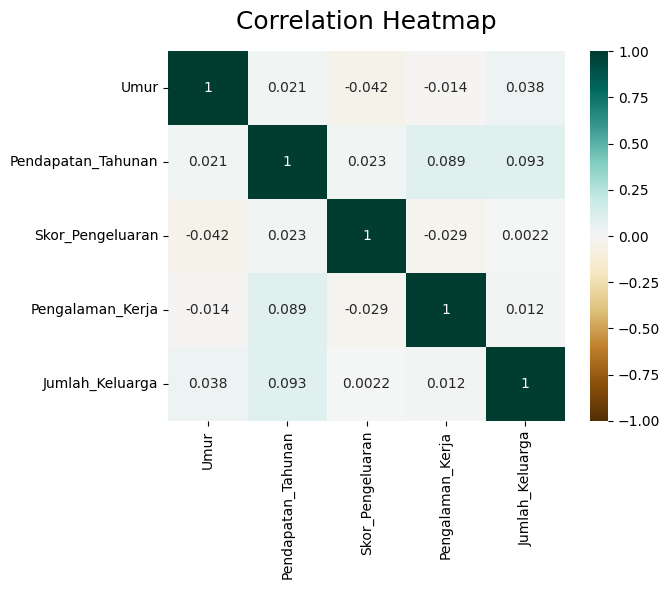

In [ ]:
# define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df_final.corr(), mask=None, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Berdasarkan data tersebut:

Jumlah Keluarga memiliki korelasasi yang lemah yaitu 0.093. Kemudian Pengalaman Kerja 0.089. kemudian skor pengeluaran 0.023, dan umur memiliki korelasi paling lemah 0.021

**<h2>9. Membangun Model (Model Regresi). </h2>**

In [ ]:
df

CustomerID Jenis_Kelamin  Umur  Pendapatan_Tahunan  Skor_Pengeluaran  \
0              1          Male    19               15000                39   
1              2          Male    21               35000                81   
2              3        Female    20               86000                 6   
3              4        Female    23               59000                77   
4              5        Female    31               38000                40   
...          ...           ...   ...                 ...               ...   
1995        1996        Female    71              184387                40   
1996        1997        Female    91               73158                32   
1997        1998          Male    87               90961                14   
1998        1999          Male    77              182109                 4   
1999        2000          Male    90              110610                52   

            Profesi  Pengalaman_Kerja  Jumlah_Keluarga  
0        Healthcare                 1                4  
1          Engineer                 3                3  
2          Engineer                 1                1  
3            Lawyer                 0                2  
4     Entertainment                 2                6  
...             ...               ...              ...  
1995         Artist                 8                7  
1996         Doctor                 7                7  
1997     Healthcare                 9                2  
1998      Executive                 7                2  
1999  Entertainment                 5                2  

[2000 rows x 8 columns]

In [ ]:
df.corr()

<ipython-input-49-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


CustomerID      Umur  Pendapatan_Tahunan  \
CustomerID            1.000000  0.070700            0.328400   
Umur                  0.070700  1.000000            0.021378   
Pendapatan_Tahunan    0.328400  0.021378            1.000000   
Skor_Pengeluaran      0.018936 -0.041798            0.023299   
Pengalaman_Kerja      0.091574 -0.014319            0.089136   
Jumlah_Keluarga       0.159655  0.038254            0.093005   

                    Skor_Pengeluaran  Pengalaman_Kerja  Jumlah_Keluarga  
CustomerID                  0.018936          0.091574         0.159655  
Umur                       -0.041798         -0.014319         0.038254  
Pendapatan_Tahunan          0.023299          0.089136         0.093005  
Skor_Pengeluaran            1.000000         -0.028948         0.002232  
Pengalaman_Kerja           -0.028948          1.000000         0.011873  
Jumlah_Keluarga             0.002232          0.011873         1.000000

In [ ]:
X = df['Pendapatan_Tahunan'].values.reshape(-1,1) #kolom pendapatan tahunan
y = df['Jumlah_Keluarga'].values.reshape(-1,1) #kolom banyaknya keluarga

In [ ]:
from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
round(model.score(X_test,y_test) * 100 ,2)

0.25

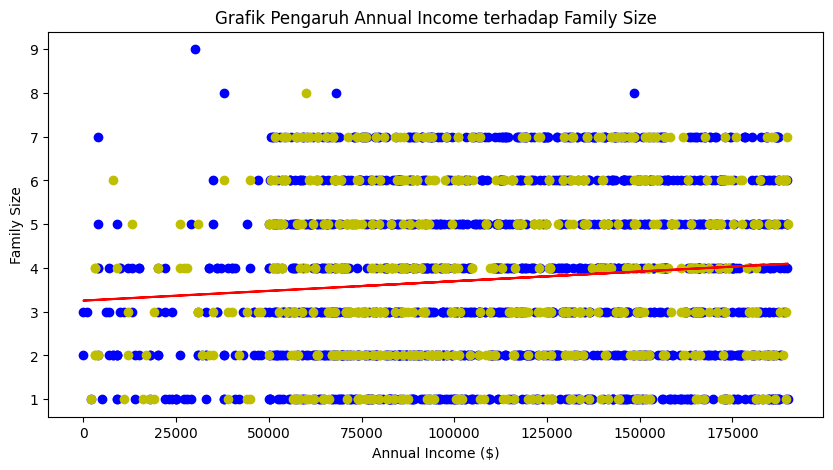

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x_train,y_train,c='b')
ax.plot(x_train,model.predict(x_train),c='r')
ax.scatter(X_test,y_test,c='y')

ax.set_xlabel('Annual Income ($)')
ax.set_ylabel('Family Size')
ax.set_title('Grafik Pengaruh Annual Income terhadap Family Size')

plt.show()

In [ ]:
model.predict([[2]])

array([[3.25465815]])

**<h2>10.	Evaluasi Model</h2>**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [ ]:
df

Jenis_Kelamin  Umur  Pendapatan_Tahunan  Skor_Pengeluaran  Profesi  \
0                 1    19               15000                39        6   
1                 1    21               35000                81        3   
2                 0    20               86000                 6        3   
3                 0    23               59000                77        8   
4                 0    31               38000                40        4   
...             ...   ...                 ...               ...      ...   
1995              0    71              184387                40        0   
1996              0    91               73158                32        2   
1997              1    87               90961                14        6   
1998              1    77              182109                 4        5   
1999              1    90              110610                52        4   

      Pengalaman_Kerja  Jumlah_Keluarga  
0                    1                4  
1                    3                3  
2                    1                1  
3                    0                2  
4                    2                6  
...                ...              ...  
1995                 8                7  
1996                 7                7  
1997                 9                2  
1998                 7                2  
1999                 5                2  

[2000 rows x 7 columns]

In [ ]:
df.shape

(2000, 7)

In [ ]:
from sklearn.linear_model import LinearRegression

# X_train adalah data fitur untuk pelatihan
# y_train adalah data target untuk pelatihan
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()


 mengganti data string 0 & 1

In [ ]:
df['Jenis_Kelamin'] = LE.fit_transform(df['Jenis_Kelamin'])


df['Profesi'] = LE.fit_transform(df['Profesi'])
df.head()

Jenis_Kelamin  Umur  Pendapatan_Tahunan  Skor_Pengeluaran  Profesi  \
0              1    19               15000                39        6   
1              1    21               35000                81        3   
2              0    20               86000                 6        3   
3              0    23               59000                77        8   
4              0    31               38000                40        4   

   Pengalaman_Kerja  Jumlah_Keluarga  
0                 1                4  
1                 3                3  
2                 1                1  
3                 0                2  
4                 2                6

In [ ]:
X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
df.columns

Index(['Jenis_Kelamin', 'Umur', 'Pendapatan_Tahunan', 'Skor_Pengeluaran',
       'Profesi', 'Pengalaman_Kerja', 'Jumlah_Keluarga'],
      dtype='object')

In [ ]:
features = [['Jenis_Kelamin', 'Umur', 'Skor_Pengeluaran','Jumlah_Keluarga' , 'Profesi',
 'Pengalaman_Kerja']]

<Axes: >

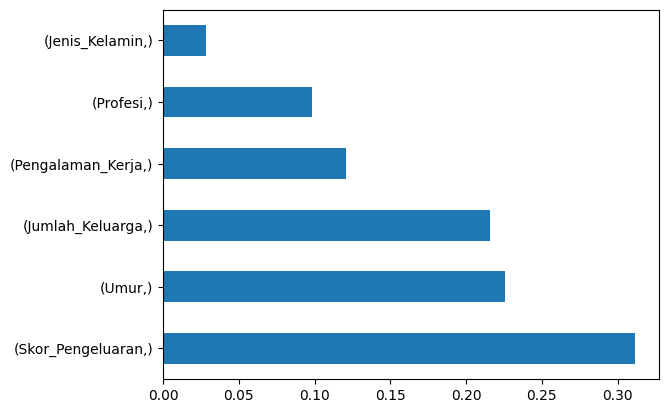

In [ ]:
feat_importances = pd.Series(regressor.feature_importances_, features)
feat_importances.nlargest(6).plot(kind='barh')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8516250000000003
Mean Squared Error: 4.67499375
Root Mean Squared Error: 2.1621733857394507
